# Chapter I - Electrical Resistance and Simple Electrical Networks

Here you should learn how to calculate a resistance in simple electrical networks. If you already know about this you could skip the part. At the end of this chapter I will cover a simple infinite network as well.

For Drawing electrical circuits there is this realy nice python package called **lcapy** that I will use here. But do not let the code distract you.


## 1. What is Electrical Resistance

### What drives electricity?

It is the electrical force. Usually denoted with the letter \$ E \$. \$ E \$ is measured in \$ \frac{Volts}{meter} \$ or \$ \frac{V}{m} \$ for short.

If the contacts in your electrical outlet are \$ 20mm \$ apart and the outlet provides a Voltage of \$ 240V \$$ then between the contacts there is some electric field of 

$$ \frac{240V}{20mm} = 12\frac{V}{mm} = 12\frac{kV}{m} $$

For the most part we are not often concerned with the \$ E \$ Field but with the Voltage. This is what we measure with a Multimeter. Between any 2 Points in a network we can measure a Voltage: 


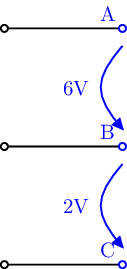

In [1]:
from lcapy import *
net = Circuit()
net.add("""
P B A; up, v=6V, color=blue
P C B; up, v=2V, color=blue
W 0_0 C; right
W 1_0 A; right
W 2_0 B; right
;style=european, bipole label style={color=blue}

""")
net.draw(style='european',scale=0.5)


If you use your Voltmeter to measure between points **A** and **B** and you measure a Voltage of \$ 6V \$ between them. (You put the black cable (.) to **B** and the red cable (+) to **A**) then you say: Point **A** has an Electric **Potential** that is 6 Volts higher then B. If you do this the also between B and C then you can conclude that the Voltage (or as we say *the potential difference* between A and C is 8 Volts.

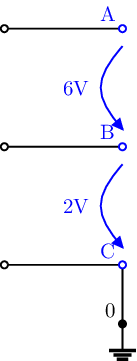

In [2]:
from lcapy import *
net = Circuit()
net.add("""
P B A; up, v=6V, color=blue
P C B; up, v=2V, color=blue
W 4_0 C; right
W C 0 ; down=0.5, ground
W 1_0 A; right
W 2_0 B; right
;style=european, bipole label style={color=blue}

""")
net.draw(style='european',scale=0.5)

For this reason most circuits diagrams have a point that is denoted as *Ground* which is sayed to have Zero Volts. And from there all voltages or *potentials* are measured. In this case point A would have a potential of 8 Volts. But we could also have choose e.g. point B as ground and in this case A would only have 6 Volts but C would have \$ -2V \$ that is negative 2 Volts.

In the US the symbol used for voltage in equestions is **V**. In Europe we mainly use **U**. Some people use V for a potential (measured from Ground) and U for an arbitrary Voltage measured between 2 points. Here I will use mostly U as voltage. Like e.g.

$$ U_{BC}=2V $$



### Let it flow: Electrical Current

Now if we have a medium where current can flow and we apply a voltage then a current will flow. The symbol for the current is I and the current is measured in Ampere or A for short. e.g.

$$ I=1.5A $$

As 1A is already a rather high current we often use *mA* (milli Ampere) which is \$ \frac{1}{1000} A \$

$$ I = 1A = 1000mA $$

### Resistance Is Futile

Now back in 1827 Georg Ohm formulate his famous law that describes how many material react to electrical voltage. He found that the current is proportional to the voltage in many materials. Some are isolators which conduct alost no electricity. Some are good conductors (e.g. metals) with almost no resistance and some are in the middle.

E.g. a copper wire with a cross section of \$ A = 1mm^2 \$ and a length of \$ L= 1 m \$ has a resistance of \$ R = 17m \Omega \$ 

$$ R = \frac{U}{I} $$

$$ I = \frac{U}{R} $$

$$ U = I \times R $$ 

So if you bought a resistor from RadioShack with a resistance of \$ R=1.2k\Omega \$ and you connect it to a small battery with \$ U=9V \$ then there is a current of \$ \frac{9}{1.2} = 7.5mA \$ 

Or if you use your multimeter to measure the voltage of this resistor that is in a complicated cicuit board and you measure a voltate of 2.4 Volts then you can be sure that there will be a current of \$ 2mA \$ flowing throught that \$ 1.2k\Omega \$ resistor right now.  

### Wireing it up - Connecting multiple Resistors 

So what happensn if you build a small circuit with 2 resistors in series? 


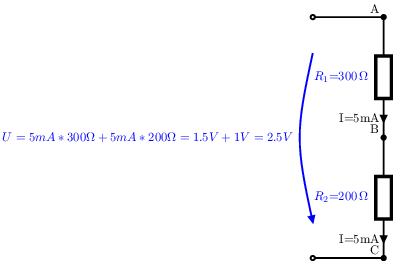

In [3]:
from lcapy import *
net = Circuit()
net.add("""
R1 A B 300; down=1.7, i=I=5mA
R2 B C 200; down=1.7, i=I=5mA
W 4_0 C; right
W 1_0 A; right
P 4_0 1_0; up, v={U=5mA * 300\Omega + 5mA*200\Omega = 1.5V + 1V = 2.5V } , color=blue

;style=european, bipole label style={color=blue}

""")
net.draw(style='european',scale=0.3)

So the same current that flows through resistor \$ R_1 \$ needs to flow through the second resistor. So both see the same current. As the voltage from B to C and the voltage from A to B add up. (Remember the voltage is a *potential*). 

Thus from outside it looks like the total resistance between the points A and C is:

$$ R = R_1 + R_2 $$

Because

$$ R = \frac{U}{I} = \frac{U_1+U_2}{I} = \frac{I*R_1+I*R_2}{I} = \frac{(R_1+R_2)*I}{I} $$

So the resistors connected in series are the sum of the 2 individual resistors. Of course this also works for more then two. If the two resistors would be he same size then the total resistance would be twice the individual one.

### Kirchhoff's Law

If we have a point in our circuit where a few wires are connected together we could measure the current in each of these wires and we sum up all the incomming and all the outgoing currents towards this point then their sum must be equal.

Or if we assume that all currents are incomming then some of them would be measured as negative. This should be obvious because it where not like this then the electrons would have to accumulate in this connection point.



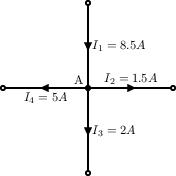

In [4]:
from lcapy import *
net = Circuit()
net.add("""
W A 0_0; right=1.2, i=I_2=1.5A
W A 1_1; down=1.2, i=I_3=2A
W A 2_2; left=1.2, i=I_4=5A
W 3_3 A; down=1.2, i=I_1=8.5A
;style=european, bipole label style={color=blue}

""")
net.draw(style='european',scale=0.3)

So the currents that meet in point A are one incomming current of 8.5A and 3 outgoing currents of 1.5, 2 and 5 Amps. 

$$ \sum{}{}{I_{incomming}} = \sum{}{}{I_{outgoing}} $$

There is a similar law from Kirchhoff for Voltages that say the voltages in a loop drawn in a cicuit diagram need to sum up to zero if voltages that are going in the oposit direction of thel loop are counted as negative. But this law is equivalent to stating that the voltages form a potential, that is that they sum up as shown above.


### So lets connect resistors in paralell:

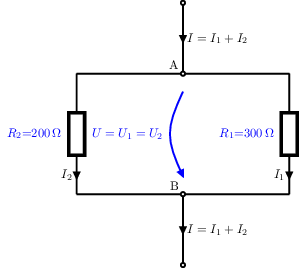

In [5]:
from lcapy import *
net = Circuit()
net.add("""
R1 3_0 4_0 300; down=1.7, i=I_1
R2 1_0 2_0 200; down=1.7, i=I_2
W A 1_0; left=1.5
W B 2_0; left=1.5
W A 3_0; right=1.5
W B 4_0; right=1.5
W 5_0 A; down=1,  i=I=I_1+I_2
W B 6_0; down=1, i=I=I_1+I_2
P B A; up, v=U=U_1=U_2, color=blue


;style=european, bipole label style={color=blue}

""")
net.draw(style='european',scale=0.3)

So the current I that splits up in point A where one part goes to the right and runs as \$ I_1 \$ through \$ R_1 \$ and the other part runs as \$ I_2 \$ through \$ R_2 \$ combines again in point B. The voltage \$ U=U_1=U_2 \$ over both resistors is the same. It is the *potential difference* between the points A and B. Thus we get:

$$ R=\frac{U}{I}=\frac{U}{I_1 + I_2} = \frac{U}{ \frac{U}{R_1} + \frac{U}{R_2}} = \frac{U}{ U*(\frac{1}{R_1} + \frac{1}{R_2}) } = \frac{1}{ \frac{1}{R_1} + \frac{1}{R_2} } $$


Or

$$ \frac{1}{R} = \frac{1}{R_1} + \frac{1}{R_2} $$ 

Of course this works the same way for 3 or more resistors in paralell. If there are two resistors in parallel with the same value then their total value is half of the original one.

Equiped with this knowledge you can compute the total resistance of complicated networks of individual resistors and you can also compute the currents and voltages there by pulling together resistors that are in parallel or in series. Lets do a simple example:


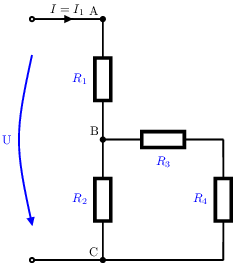

In [6]:
from lcapy import *
net = Circuit()
net.add("""
R1 A B ; down=1.7, 
R2 B C ; down=1.7
W 4_0 C; right
W 1_0 A; right, i=I=I_1
P 4_0 1_0; up, v={U} , color=blue
R3 B 5_0; right=1.7
R4 5_0 6_0; down=1.7
W 6_0 C; left
;style=european, bipole label style={color=blue}

""")
net.draw(style='european',scale=0.3)

We add up \$ R_3 \$ and \$ R_4 \$ and those to are then in parallel to \$ R_2 \$

$$ R_{34}=R_3 + R_4 $$

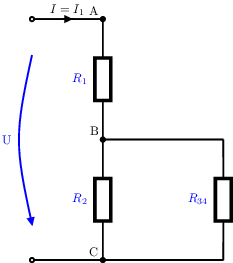

In [7]:
from lcapy import *
net = Circuit()
net.add("""
R1 A B ; down=1.7, 
R2 B C ; down=1.7
W 4_0 C; right
W 1_0 A; right, i=I=I_1
P 4_0 1_0; up, v={U} , color=blue
W B 5_0; right=1.7
R34 5_0 6_0; down=1.7
W 6_0 C; left
;style=european, bipole label style={color=blue}

""")
net.draw(style='european',scale=0.3)

Now we have \$ R_2 \$ and the combined \$ R_{34} \$ in parallel. So we replace it with a combined \$ R_{234} \$ :


$$ R_{234} = \frac{1}{ \frac{1}{R_2} + \frac{1}{R_{34}} } $$

And then we only need to add \$ R_1 \$:

$$ R = R_1+R_{234} = R_1 + \frac{1}{ \frac{1}{R_2} + \frac{1}{R_3+
 R_4} } $$
 
 If we know the overall voltate U then we can use this total R to calculate \$ I = I_1 \$. This tells us the voltage over \$ R_1 \$ and we can calculate the voltage over  \$ R_2 \$ as:
 
 $$ U_{2} = U - U_1 = U - I_1*R_1  $$
 
 and from there it is easy to calculate the other currents and voltages.
 

### Is this even usefull? 

Why would I connect so many resistors together? Well, in real live you do not build up such complicated networks of resistors but you can often aproximate some more complicated circuits, at least for small changes. And then the same way we deal with resistors we can also deal with capacitors and inductors. We would treat them as complex valued resistors. But that would be a topic for a different video.


### It is not always that easy

While the method above will be useful in a lot of cases there are networks that are more close meshed and can not be solved by repeateadly replacing series and parallel connections. Here is one example:


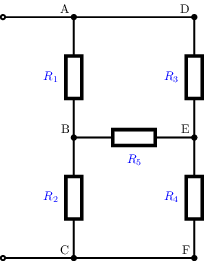

In [8]:
from lcapy import *
net = Circuit()
net.add("""
R1 A B ; down=1.7, 
R2 B C ; down=1.7
W 4_0 C; right
W 1_0 A; right, 
P 4_0 1_0; up
R5 B E; right=1.7
R4 E F; down=1.7
W F C; left
W D A; left=1.7
R3 D E; down=1.7 
;style=european, bipole label style={color=blue}

""")
net.draw(style='european',scale=0.3)

If you find such a close meshed network there you have serveral options to still solve it:

1. You do it **the hard way** by writing down the equations for currents and voltages according to Kirchhoff's law and then solve the system of linear equations. This always works but is cumbersome.
2. Somtimes you can replace a triangle of 3 resistors from a **triangular** shape to a **star** shape. This is always posible for 3 resistors and there is a forumlar for doing this transformation. This would e.g. work in the above circuit.
3. Maybe in special cases you find some **symetry** in the network then you can use. E.g. If the ration of \$ \frac{R_1}{R_2} \$ is the same as the ratio \$ \frac{R_3}{R_4} \$ then you know that the voltage between B and E must be zero (because B and E are on the same potential). If the voltage over \$ R_5 \$ is zero the current is also zero. So in case of this symetrie you could simply remove \$ R_5 \$ from the circuit alltogether which makes the circuit trivial to solve again.


# The Superposition Principle

In order to find the resistance in our infinite grid there is one important thing left to learn. The **Superposition Principle**.

But before that:


### A Word About Power Sources

So far we just assumed that there is a voltage or a current. But where is it comming from? Well you can have a voltage source (e.g. a battery or a lab bench DC power supply). An ideal **voltage source** always gives out the same voltage and supplys as much current as necessary to keep that voltage. If you connect a load to your power supply with a very low resistance it would need to deliver a very high current and a real power supply has a limit on how much current it can provide. The worst you could do is short circuit it. Also if the power supply is connected to a network that has a higher voltage it would ideally take in some current. In this sense a short circuit or a piece of wire can be seen as a power supply that always delivers 0 Volts.

There are also current sources which work just the opposit way: It will try to deliver a definned current and would change its output voltage in a way that whatever the network is that the given current is flowing. Of course: If you connect a network with a high resistance it would need a high voltage. Each real power supply has a limit on how high this voltage can be. The worst thing to do to a current source is to disconnect it. If you disconnect a current soure from a network you kind of replace it with a current source that delivers 0 Ampere.

In real live a battery is often modeled as an internal ideal voltage source with some internal resistnace that would make the output level drop when the current is to high.



### The Superposition Principle

So if we have a complicated network of many resistors and many power supplys and we measure some voltage on the other end of that network then this voltage will depend on all the power supplys in the network. 

1. If we switch off all power supplys (or more preciesely: we replace all voltage sources with a voltage source of 0 Volts - that is we replace them with a short circuit and we replace all current sources with a current source of 0 Ampere - that is we disconnect those current sources) then the all voltages and all currents in the network are 0.
2. Now if we individually turn on each power supply we get a certain output voltage on the other end of the complicated network for each of then. If we combine them, that is we turn them all on, the output voltage that we see is the some of each individual effects that we have measured. This is because the whole system is **linear**.

E.g.:

In the complicated network we measure the voltage \$ U_{out} \$ over resistor \$ R_{1042} \$ . And we have 2 voltage sources \$ U_1 \$ and \$ U_2 \$ and one current source \$ I_1 \$ in the system.

* Now we set \$ U_1 = 10V \$ and \$ U_2=0V \$ and \$ I_1=0A \$. Lets say we measure \$ U_{out} = 4.1V \$ 
* In the next step we turn of \$ U_1 \$ and then have \$ U_1 = 0V \$ and \$ U_2 = 20V \$ and \$ I_1=0A \$ and this time we measure \$ U_{out} = 1.3V \$
* In the next step we only use the current source \$ U_1 = 0V \$ and \$ U_2 = 0V \$ and \$ I_1=0.5A \$ and this time we measure \$ U_{out} = 17.2V \$

This means if we now turn on all our 3 power supplies, that is \$ U_1 = 10V \$ and \$ U_2=20V \$ and \$ I_1=0.5A \$ we know that the measured output has to be 

$$ U_{out} = 4.1V + 1.3V +17.2V = 22.6V $$

This is the **Superposition Principle**.

We can even predict that if we e.g. double the voltage on \$ U_2 \$ to \$ U_2 = 20V+20V = 40V \$ the output will increase by \$ 1.3V \$ (since the 20V in the second step gave us this voltage).


# The Infinit Grid of Resistors - Our First Victory

Equiped with the knowledge above we are ready to get our first (and much easier) result on the infinit gird of resistors. The resistance betwen 2 adjoining points.


In [1]:
from chapter0drawgrid import drawgrid
drawgrid(4)

For simplicty we assume each resistor is \$ 1\Omega \$.

Now since the whole network is symetrical in all 4 direction. If we use a current source on the middle point \$ m=0,n=0 \$ (the green label). To inject a current of 1A then this current will evenly split into all directions. And ther will be 

$$ I_{north} = I_{east} =  I_{west} = I_{south} = \frac{1A}{4} = 0.25A $$

Of course in order to *inject* this current we need to connect to the network in a second place but we assume we have a wire that goes to many points infinitely far aways. So this might need a high voltage (even thought the total resistance grows rather slowly it would be infinit from any point to infinity. But we could just assume we have an extremly large network of millions of resistor and take the limit as the distance of the outside conections approach infinity). 

Now what we immeditatly know is that the voltage between any of the 4 adjoining points is\$ 0.25V = \frac{0.25A}{1\Omega} \$  lower then the potential in the middle \$ m=0,n=0 \$ 

That is if we use a multimeter to measure the voltage between the red and the green label we would measure 0.25V. For simplicity we define the potential in the middle as 0V then the potential on the red label is -0.25V.

Now we remove the current source in the middle and we connect one on the red point instead. And instead of sending a current in we use a current source that draws 1A **out** of the network. (Or sends in a current of -1A if you want).

Again the current will split up evenly in all 4 directions and again the potential of all the adjoining points in all 4 direction would be 0.25V different from the point of injection but this time (since we have the current in the other direction) the voltage would be higher in the 4 neighboring points. In particular we would measure voltage of +0.25V at the green middle point.

So if where following the discussion of the **Superposition Principle** you will know what happens when both current sources are operating at the same time. We send in 1A at the green point and draw out 1A at the red point. Since we draw out all the current that we send in there will no longer current flowing "out" at infinity. Now we with the superposition we have. 

$$ I_{red-green}=0.25A + ( 0.25A) = 0.5A $$

and thus:

$$ U_{red-green}=0.5V $$

and we also know that the total current that we send in send in is 1A. Thus:

$$ R_{red-green}=\frac{0.5V}{1A}=0.5\Omega $$

So the parallel resistance of the whole network around this one resistor only halfs the total resistance. 

So that was not all to difficult. Unfortunately the diagonal case is way more difficult and we need to bring in a rather heavy mathematical maschinery. But first lets look at an easier infinite network.






# A much easier infinite Network 

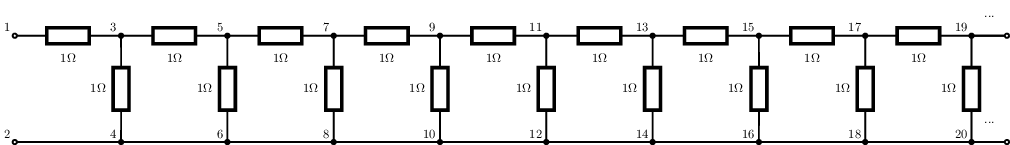

In [24]:
from lcapy import *
net = Circuit()
n=9
for i in range(n):
  p1=i*2+1
  p2=i*2+2
  net.add(f"""
    R{p1} {p1} {p1+2}   ;right=1.5, l=1\Omega
    W {p2} {p2+2}       ;right=1.5 
    R{p2} {p1+2} {p2+2} ; down=1.5, l=1\Omega
  """)
net.add(f"""
    W {n*2+1} {n*2+3}_0  ;right=0.5, l=...  
    W {n*2+2} {n*2+4}_0  ;right=0.5, l=...
  """)
net.draw(style='european',scale=0.3)

So lets pretend the network extends infinitly far to the right and all resistors are equal to \$ 1\Omega \$. What is the total resistance measured between points 1 and 2?

This is quite easy to solve. Lets denote the total resistance with \$ R\$. If we cut the network at points 3 and 4 we still should see the same resistance on the total of the right network. Thus we have:

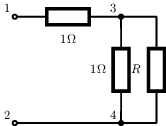

In [26]:
from lcapy import *
net = Circuit()
n=1
for i in range(n):
  p1=i*2+1
  p2=i*2+2
  net.add(f"""
    R{p1} {p1} {p1+2}   ;right=1.5, l=1\Omega
    W {p2} {p2+2}       ;right=1.5 
    R{p2} {p1+2} {p2+2} ; down=1.5, l=1\Omega
  """)
net.add(f"""
    W {n*2+1} {n*2+3}_0  ;right=0.5   
    W {n*2+2} {n*2+4}_0  ;right=0.5
    R {n*2+3}_0 {n*2+4}_0 ; down=1.5
  """)
net.draw(style='european',scale=0.3)

Which gives: 

$$ R=1+\frac{1}{ \frac{1}{1}+\frac{1}{R} } $$

Or 

$$ R=1+\frac{R}{R+1} $$ 
$$ R(R+1) = R+1 + R $$ 
$$ R^2-R-1 =0 $$ 

In [29]:
from sympy import *
R=symbols("R")
simplify(R-1-1/(1+1/R))

In [31]:
R=symbols("R")
eq1=simplify((R-1-1/(1+1/R))*(R+1))
eq1

In [44]:
r=solve(eq1)
r

In [47]:
N(r[0])

In [48]:
N(r[1])


Since the negative value does not make much sense we get the solution

$$ R=\frac{1+\sqrt(5)}{2}= 1.6180339887498.. $$

which is the **golden ratio**.

This was not to complicated.

Also note that by normally combing resistors we only get rational fraction of those resistors. Here we got an *algebraic number* (One which include roots of polinomials). This is because we combine infinitely many resistors.

Now to solve the 2 dimensional grid we need to aquire some additional skills. Lets do that in the next chapter.